In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Funções Implementadas

In [2]:
def solve_Lower_triang_matrix(A, B):
    n = len(A)
    X = np.zeros((n, 1), dtype=float)

    for i in range(n):
        dot_product = 0.0
        for j in range(i):
            dot_product += A[i, j] * X[j]
        X[i] = (B[i] - dot_product) / A[i, i]

    return X

In [3]:
def solve_Upper_triang_matrix(A, B):
    n = len(A)
    X = np.zeros((n, 1), dtype=float)

    for i in range(n - 1, -1, -1):
        dot_product = 0.0
        for j in range(i + 1, n):
            dot_product += A[i, j] * X[j]
        X[i] = (B[i] - dot_product) / A[i, i]

    return X

In [4]:
def LU_decomposition(A):
    n = A.shape[0]
    U, L = A.copy(), np.eye(n)

    for i in range(n):
        for j in range(i+1, n):
            coef = -U[j, i] / U[i, i]
            L[j, i] = -coef
            U[j] += U[i] * coef

    return L, U

In [5]:
def LU_solution(A, B):
    L, U = LU_decomposition(A)

    Y = solve_Lower_triang_matrix(L, B)
    X = solve_Upper_triang_matrix(U, Y)

    return X

In [6]:
def gera_estimativa(coef, x):
    sum = 0

    for i in range(0, len(coef)):
        sum += coef[i]*(x**i)

    return sum

In [48]:
def divided_differences(x, fx):
    n = len(fx)
    table = np.zeros((n, n))
    table[:, 0] = fx

    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x[i + j] - x[i])

    return table[0]

In [8]:
def newton_interpolation(x0, xroots, divided_differences):
    n = len(xroots)
    result = 0

    for i in range(n):
        term = divided_differences[i]
        for j in range(i):
            term *= (x0 - xroots[j])
        result += term

    return result

In [9]:
def lagrange_interpolation(x0, xroots, yroots):
    n = len(xroots)
    result = 0

    for k in range(n):
        prod = 1

        for j in range(n):
            if j != k:
                prod *= (x0 - xroots[j]) / (xroots[k] - xroots[j])

        result += yroots[k] * prod

    return result

# 1 – Desenvolva um algoritmo para encontrar o polinômio interpolador do conjunto de pontos {(𝟎, 𝟏), (𝟏, 𝟔), (𝟐, 𝟓), (𝟑, −𝟖)}, utilizando o processo de solução de sistemas de equações. Plote o gráfico obtido ! (ok)


In [27]:
x1 = np.array([0, 1, 2, 3])
fx1 = np.array([1, 6, 5, -8])

n = len(x1)

In [28]:
A1 = np.ones([n, n], dtype='float')

#Matriz de Vandermond
for i in range(0, n):
    for j in range(0, n):
        A1[i, j] = x1[i]**(j)

In [29]:
B1 = np.ones([n, 1], dtype='float')

for i in range(0, n):
    B1[i] = fx1[i]

In [30]:
sol1 = LU_solution(A1, B1)

[]

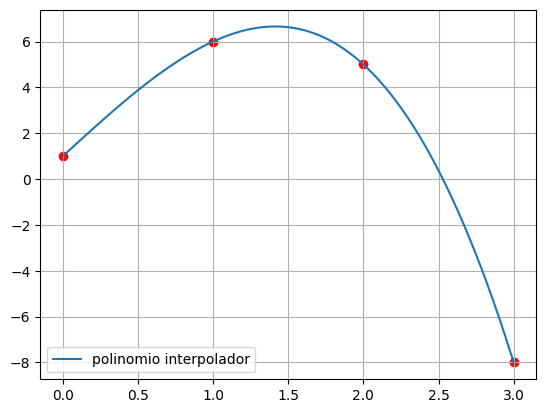

In [31]:
xx1 = np.linspace(min(x1), max(x1), 1001)

plt.plot(xx1, gera_estimativa(sol1, xx1), label='polinomio interpolador')
plt.scatter(x1, fx1, c='r')

plt.legend()
plt.grid()
plt.plot()

# 2 – Desenvolva um algoritmo que use o método de diferenças divididas para encontrar o polinômio que passe pelos pontos (−𝟏, 𝟑), (𝟎, 𝟏), (𝟏, 𝟑), (𝟑, 𝟒𝟑). Compare os resultados com o obtido de forma teórica:

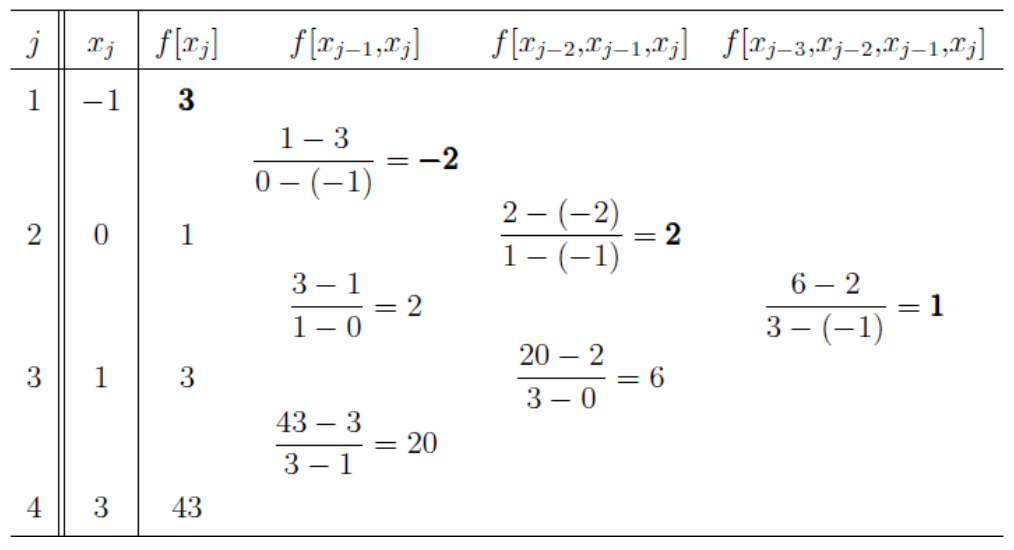

In [45]:
x2 = np.array([-1, 0, 1, 3], dtype='float')
y2 = np.array([3, 1, 3, 43], dtype='float')

[]

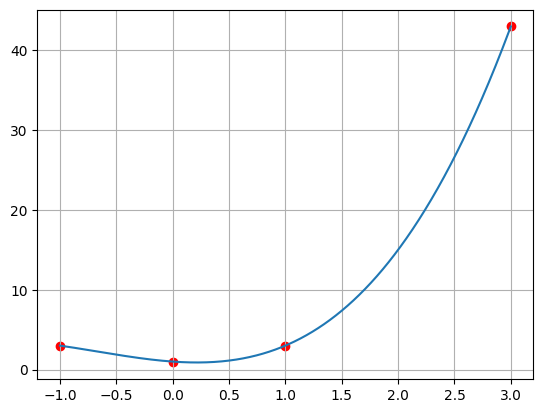

In [49]:
xx2 = np.linspace(min(x2), max(x2), 1001)

plt.plot(xx2, newton_interpolation(xx2, x2, divided_differences(x2, y2))) #[3. -2.  2.  1.]
plt.scatter(x2, y2, c='r')

plt.grid()
plt.plot()

# 3 – Encontre o polinômio da forma $𝒑(𝒙) = 𝒂_{0} + 𝒂_{1}𝒙 + 𝒂_{2}𝒙^𝟐 + 𝒂_{3}𝒙^3$ que passa pelos pontos (𝟎, 𝟎), (𝟏, 𝟏), (𝟐, 𝟒), (𝟑, 𝟗), utilizando o método de Lagrange. Apresente a expressão de cada polinômio de Lagrange.

In [36]:
x3 = np.array([0, 1, 2, 3], dtype='float')
y3 = np.array([0, 1, 4, 9], dtype='float')

[]

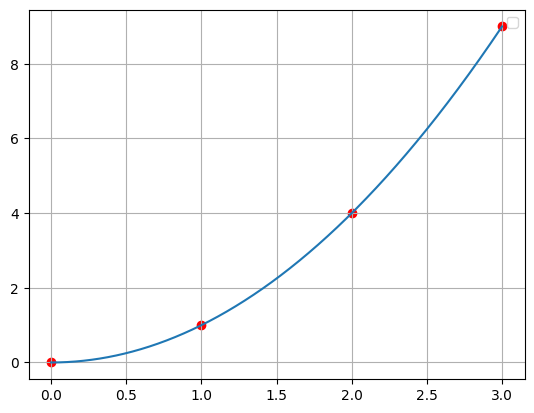

In [37]:
xx3 = np.linspace(min(x3), max(x3), 1001)

plt.plot(xx3, lagrange_interpolation(xx3, x3, y3))
plt.scatter(x3, y3, c='r')

plt.legend()
plt.grid()
plt.plot()

# 4 – Construa uma função linear por partes que interpola os pontos (𝟎, 𝟎), (𝟏, 𝟒), (𝟐, 𝟑), (𝟑, 𝟎), (𝟒, 𝟐), (𝟓, 𝟎), utilizando:



In [56]:
x4 = np.array([0, 1, 2, 3, 4, 5], dtype='float')
y4 = np.array([0, 4, 3, 0, 2, 0], dtype='float')

##(a) Spline linear;


##(b) Spline quadrática;


In [57]:
# Defining the matrix A of coefficients of the system of equations provided by
# the definition of quadratic spline interpolation
def quadratic_coef_A(x):
    n = len(x) - 1
    A = np.zeros((3*n, 3*n), dtype='float')

    for i in range(0, 2 * n):
        for j in range(3):
            A[i][j + 3*(i // 2)] = x[(i + 1)//2] ** (2 - j)

    for i in range(2 * n, (3 * n) - 1):
        for j in range(2):
                A[i][j + 3 * (i - 2 * n + 0)] = ( 1) * (2 - j) * x[i - 2 * n + 1]**(1 - j)
                A[i][j + 3 * (i - 2 * n + 1)] = (-1) * (2 - j) * x[i - 2 * n + 1]**(1 - j)

    A[3 * n - 1][0] = 2

    return A

In [58]:
# Defining the matrix B related to A
def quadratic_coef_B(fx):
    n = len(fx) - 1
    B = np.zeros((3*n, 1), dtype='float')

    for i in range(2 * n):
        B[i] = fx[(i + 1)//2]
    return B

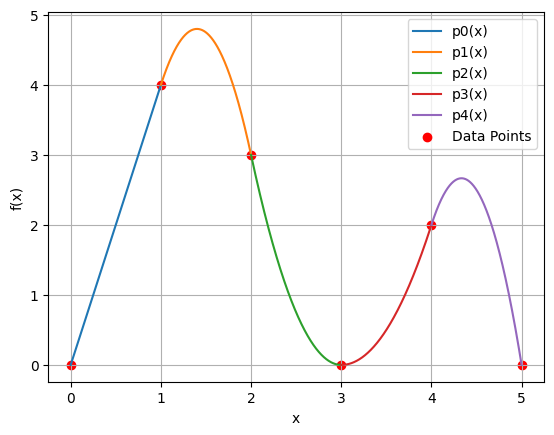

In [65]:
# Coefficient matrix A
A = quadratic_coef_A(x4)

# Coefficient matrix B
B = quadratic_coef_B(y4)

# Solve for coefficients
coeffs_quadratic = np.linalg.solve(A, B)

# Define the segmented x values
x_segments_quadratic = [element for element in x4]

# Define the list of polynomial lambda functions for each quadratical spline
polys_quadratic = [lambda x, i = i: (coeffs_quadratic[3 * i] * x**2) + (coeffs_quadratic[3 * i + 1] * x) + (coeffs_quadratic[3 * i + 2]) for i in range(len(coeffs_quadratic)//3)]

# Plot the function in its previous determinated bounds
for i in range(len(x_segments_quadratic) - 1):
    x_segment_quadratic = np.linspace(x_segments_quadratic[i], x_segments_quadratic[i + 1], 1001)
    y_segment_quadratic = polys_quadratic[i](x_segment_quadratic)  # Use the corresponding function from the list
    plt.plot(x_segment_quadratic, y_segment_quadratic, label=f'p{i}(x)')

# Plot the points in x and fx
plt.scatter(x4, y4, color='r', label='Data Points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

##(c) Spline cúbica.


In [61]:
# Defining the matrix A of coefficients of the system of equations provided by
# the definition of cubic spline interpolation
def cubic_coef_A(x):
    n = len(x) - 1
    A = np.zeros((4*n, 4*n), dtype='float')

    for i in range(0, 2 * n):
        for j in range(4):
            A[i][j + 4*(i // 2)] = x[(i + 1)//2] ** (3 - j)

    for i in range(2 * n, (3 * n) - 1):
        for j in range(3):
            A[i][j + 4 * (i - 2 * n + 0)] = ( 1) * (3 - j) * x[i - 2 * n + 1]**(2 - j)
            A[i][j + 4 * (i - 2 * n + 1)] = (-1) * (3 - j) * x[i - 2 * n + 1]**(2 - j)

    for i in range((3 * n) - 1, (4 * n) - 2):
        for j in range(2):
            A[i][j + 4 * (i - (3 * n - 1) + 0)] = ( 2) * (3 ** (1 - j)) * x[i - (3 * n - 1) + 1]**(1 - j)
            A[i][j + 4 * (i - (3 * n - 1) + 1)] = (-2) * (3 ** (1 - j)) * x[i - (3 * n - 1) + 1]**(1 - j)

    A[4 * n - 2][0], A[4 * n - 2][1]  = 6 * x[0], 2

    A[4 * n - 1][3 * n - 1], A[4 * n - 1][3 * n] = 6 * x[n], 2

    return A

In [62]:
# Defining the matrix B related to A
def cubic_coef_B(fx):
    n = len(fx) - 1
    B = np.zeros((4*n, 1), dtype='float')

    for i in range(2 * n):
        B[i] = fx[(i + 1)//2]
    return B

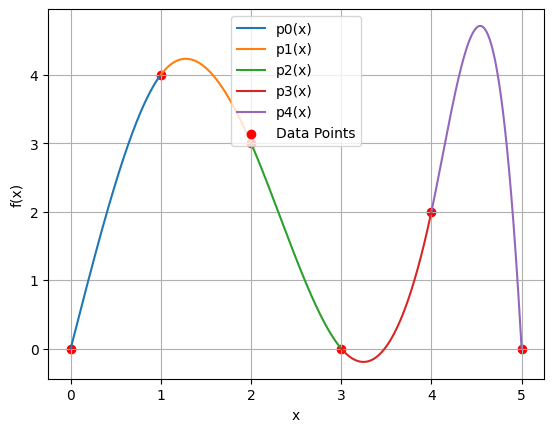

In [64]:
# Coefficient matrix A
A = cubic_coef_A(x4)

# Coefficient matrix B
B = cubic_coef_B(y4)

# Solve for coefficients
coeffs_cubic = np.linalg.solve(A, B)

# Define the segmented x values
x_segments_cubic = [element for element in x4]

# Define the list of polynomial lambda functions for each cubic spline
polys_cubic = [lambda x, i = i: (coeffs_cubic[4 * i] * x**3) + (coeffs_cubic[4 * i + 1] * x**2) + (coeffs_cubic[4 * i + 2] * x) + (coeffs_cubic[4 * i + 3]) for i in range(len(coeffs_cubic)//4)]

# Plot the function in its previous determinated bounds
for i in range(len(x_segments_cubic) - 1):
    x_segment_cubic = np.linspace(x_segments_cubic[i], x_segments_cubic[i + 1], 1001)
    y_segment_cubic = polys_cubic[i](x_segment_cubic)  # Use the corresponding function from the list
    plt.plot(x_segment_cubic, y_segment_cubic, label=f'p{i}(x)')

# Plot the points in x and fx
plt.scatter(x4, y4, color='r', label='Data Points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# 5 – Você mediu a queda de voltagem através de um resistor para diversos valores diferentes da corrente i. Os resultados são:

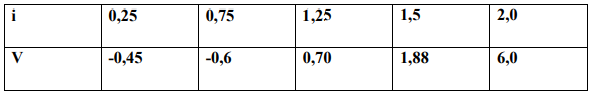

#Use interpolação polinomial de primeiro a quarto grau para fazer uma estimativa da queda de voltagem para i = 1,15. Interprete seus resultados.


In [42]:
x5 = np.array([0.25, 0.75, 1.25, 1.5, 2.0], dtype='float')
y5 = np.array([-0.45, -0.6, 0.7, 1.88, 6.], dtype='float')

In [50]:
x0 = 1.15

x1 = np.array([0.75, 1.25])
fx1 = np.array([-0.6, 0.7])
coefficients1 = divided_differences(x1, fx1)

x2 = np.array([0.75, 1.25, 1.5])
fx2 = np.array([-0.6, 0.7, 1.88])
coefficients2 = divided_differences(x2, fx2)

x3 = np.array([0.75, 1.25, 1.5, 2.0]) #1, 2, 3, 5
fx3 = np.array([-0.6, 0.7, 1.88, 6.]) # 3, 6, 19, 99
coefficients3 = divided_differences(x3, fx3)

x4 = np.array([0.25, 0.75, 1.25, 1.5, 2.0]) #1, 2, 3, 5, 7
fx4 = np.array([-0.45, -0.6, 0.7, 1.88, 6.]) # 3, 6, 19, 99, 291
coefficients4 = divided_differences(x4, fx4)

f1 = newton_interpolation(x0, x1, coefficients1)
f2 = newton_interpolation(x0, x2, coefficients2)
f3 = newton_interpolation(x0, x3, coefficients3)
f4 = newton_interpolation(x0, x4, coefficients4)

print(f'Estimativa f({x0}) 1º grau: {f1}')
print(f'Estimativa f({x0}) 2º grau: {f2}')
print(f'Estimativa f({x0}) 3º grau: {f3}')
print(f'Estimativa f({x0}) 4º grau: {f4}')

Estimativa f(1.15) 1º grau: 0.4399999999999996
Estimativa f(1.15) 2º grau: 0.32693333333333285
Estimativa f(1.15) 3º grau: 0.34783999999999954
Estimativa f(1.15) 4º grau: 0.33728639999999965
